In [527]:
import pandas as pd
import numpy as np

https://en.wikipedia.org/wiki/Spherical_coordinate_system

* **assuming** azimuthg clockwise from due north at 0°, so east is 90°, south is 180°, and west is 270°
* **altitude** is 0° at the horizon, 90° straight up

In [528]:
year = 2023
freq='60min' 

test_one_day = True
if not test_one_day:
    idx = pd.date_range(start=f'{year}-01-01', end=f'{year + 1}-01-01', freq=freq)
else:
    idx = pd.date_range(start=f'{year}-01-01', end=f'{year}-01-02', freq=freq)

In [538]:
df = pd.DataFrame(index=idx, columns=['azimuth', 'altitude', 'servo_a', 'servo_b'])

random angles

angles for a made up day

In [560]:
noon_offset = 0 # -75
altitude_min = -40 #-20
altitude_max = 40 #60

df.azimuth = ((df.index.minute + 60 * df.index.hour + noon_offset) / (60 * 24) * 360) % 360
df.altitude = (np.sin(np.radians(df.azimuth) - np.pi / 2) / 2 + 0.5) * (altitude_max - altitude_min) + altitude_min

df.altitude = np.round(df.altitude, 2)
df.azimuth = np.round(df.azimuth, 2)

In [561]:
df.servo_a = df.azimuth - 90
df.servo_b = (np.sin(np.radians(df.servo_a)) / 2 + 0.5) * (altitude_max - altitude_min) + altitude_min

df.servo_a = np.round(df.servo_a, 2)
df.servo_b = np.round(df.servo_b, 2)

In [563]:
24*60 / 180

8.0

In [562]:
df

,azimuth,altitude,servo_a,servo_b
2023-01-01 00:00:00,0.0,-40.00,-90.0,-40.00
2023-01-01 01:00:00,15.0,-38.64,-75.0,-38.64
2023-01-01 02:00:00,30.0,-34.64,-60.0,-34.64
2023-01-01 03:00:00,45.0,-28.28,-45.0,-28.28
2023-01-01 04:00:00,60.0,-20.00,-30.0,-20.00
2023-01-01 05:00:00,75.0,-10.35,-15.0,-10.35
2023-01-01 06:00:00,90.0,0.00,0.0,0.00
2023-01-01 07:00:00,105.0,10.35,15.0,10.35
2023-01-01 08:00:00,120.0,20.00,30.0,20.00
2023-01-01 09:00:00,135.0,28.28,45.0,28.28


freq of the data needs to be smaller if the step differences in altitude are too large for linear interpolation between the steps on the sculpture

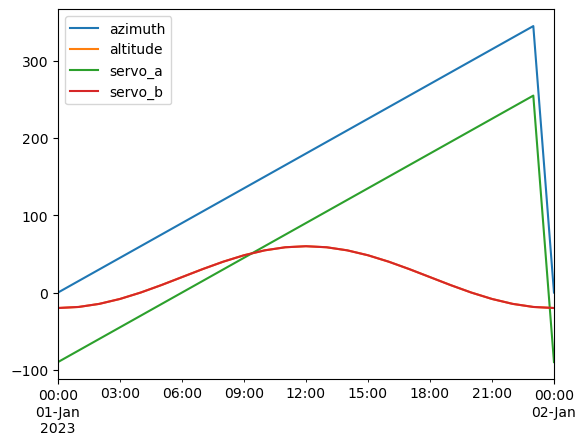

In [549]:
if test_one_day:
    df.plot()

In [533]:
df.altitude.diff().abs().describe()

count    24.000000
mean      6.666667
std       3.242005
min       1.360000
25%       4.000000
50%       7.320000
75%       9.650000
max      10.350000
Name: altitude, dtype: float64

In [534]:
print(f'average of {360/df.altitude.diff().abs().mean():.0f} steps per altitude revolution and {len(df[(df.index.day == 1) & (df.index.month == 1) & (df.index.year == year)]):.0f} steps per azimuth revolution')

average of 54 steps per altitude revolution and 24 steps per azimuth revolution


In [535]:
if not test_one_day:
    df.to_csv(f'{year}_{freq}_spherical_coordinates.csv', index=True, header=True)